In [1]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sn
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import f1_score

In [2]:
data = arff.loadarff('../dataSet/AEEEM/EQ.arff')

In [3]:
df = pd.DataFrame(data[0])
df.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,3.0,0.002547,0.002555,4.0,0.00,3.04,0.393707,0.003049,1.01,0.004091,...,0.005627,0.000000,0.004406,8.0,8.0,0.008431,3.50,0.103594,0.003611,b'buggy'
1,37.0,0.008643,0.004756,71.0,0.00,14.37,2.093750,0.001481,2.02,0.015332,...,0.018761,0.001486,0.060301,7.0,7.0,0.021602,43.12,0.328692,0.009906,b'buggy'
2,3.0,0.001479,0.009143,5.0,1.01,3.08,0.484675,0.000000,6.17,0.001953,...,0.003117,0.001486,0.002325,7.0,2.0,0.011859,4.68,0.125841,0.001655,b'clean'
3,10.0,0.005642,0.005395,38.0,0.00,1.06,0.811584,0.000876,6.07,0.000739,...,0.020376,0.002338,0.030608,17.0,10.0,0.020478,24.06,0.170416,0.007000,b'buggy'
4,1.0,0.001350,0.000000,1.0,1.01,1.01,0.031940,0.000876,0.00,0.000000,...,0.000566,0.003017,0.001492,22.0,7.0,0.000652,2.13,0.055912,0.001572,b'buggy'


In [4]:
df.describe()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,numberOfBugsFoundUntil:,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,2.083333,0.001212,0.001558,4.299383,0.261574,0.900432,0.154263,0.000553,0.887840,0.000856,...,4.586420,0.002645,0.001492,0.003581,14.722222,5.743827,0.003652,2.929660,0.034247,0.001365
std,5.848646,0.003069,0.003452,7.906567,0.949242,2.017897,0.310351,0.001573,1.812751,0.002409,...,8.452852,0.005133,0.002422,0.007835,14.142902,7.186963,0.006038,6.268788,0.053297,0.003409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.034743,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.001486,0.000000,9.000000,4.000000,0.000571,0.000000,0.002459,0.000000
75%,1.000000,0.000851,0.001306,4.000000,0.000000,1.010000,0.141907,0.000389,1.010000,0.000540,...,4.000000,0.003065,0.001829,0.003101,17.000000,7.000000,0.004918,3.227500,0.057904,0.000863
max,49.000000,0.024636,0.023417,71.000000,7.740000,16.250000,2.670750,0.015215,11.140000,0.019631,...,78.000000,0.037312,0.019677,0.060301,111.000000,54.000000,0.039637,48.680000,0.328692,0.027806


In [5]:
defect_true_false = df.groupby('class')['class'].apply(lambda x: x.count())
print(defect_true_false)

class
b'buggy'    129
b'clean'    195
Name: class, dtype: int64


In [6]:
df['class'].str.decode("utf-8")

0      buggy
1      buggy
2      clean
3      buggy
4      buggy
       ...  
319    clean
320    clean
321    buggy
322    clean
323    clean
Name: class, Length: 324, dtype: object

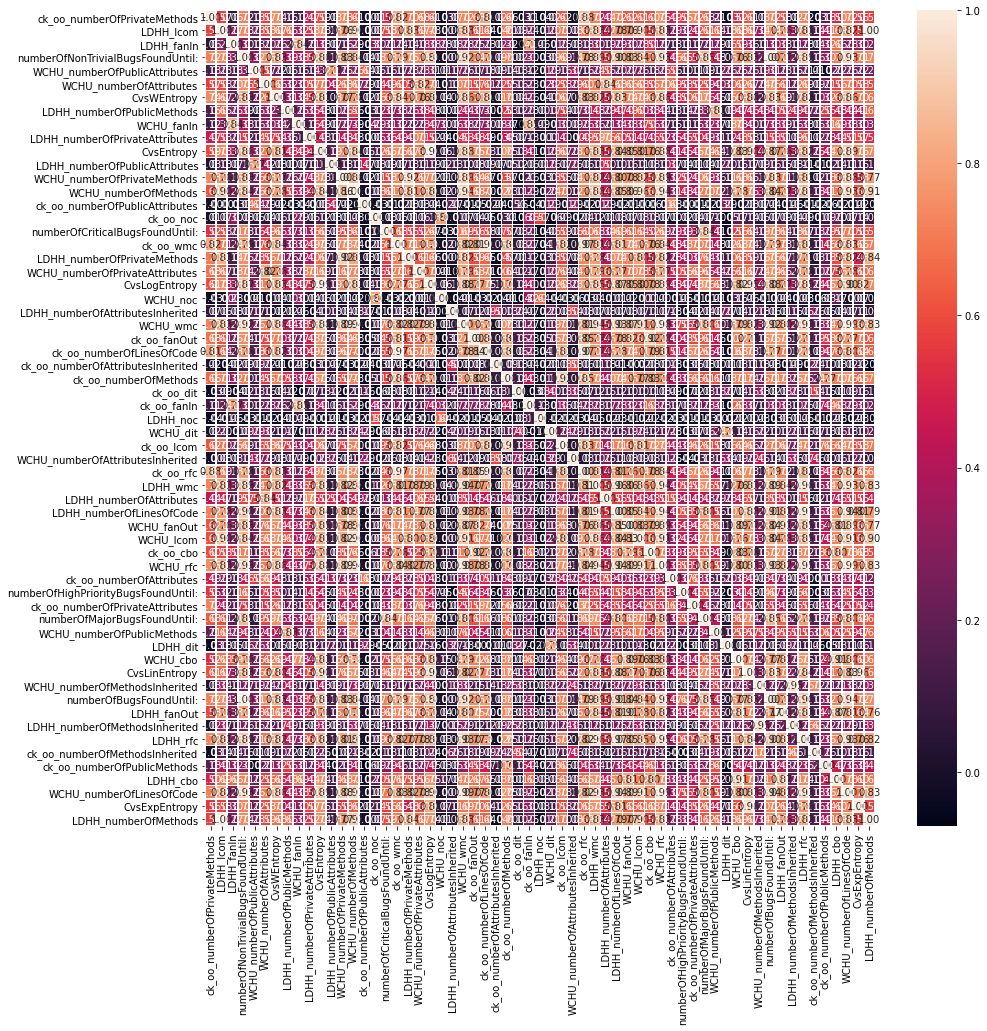

In [7]:
f,ax = plt.subplots(figsize = (15, 15))
sn.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [8]:
X= df.iloc[ : , :-1].values
y= df['class'].str.decode("utf-8")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
clf = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

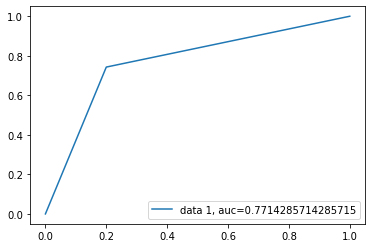

Accuracy of Entropy based Decision Tree: 0.7692307692307693
F1 score 0.7690120824449184


In [11]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.map({'buggy': 0, 'clean': 1}),  y_pred_proba)
auc = metrics.roc_auc_score(y_test.map({'buggy': 0, 'clean': 1}), y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("Accuracy of Entropy based Decision Tree:",metrics.accuracy_score(y_test, y_pred))
print("F1 score", f1_score(y_test, y_pred, average='macro'))

In [12]:
# plt.figure(figsize=(12,8))
# tree.plot_tree(clf) 

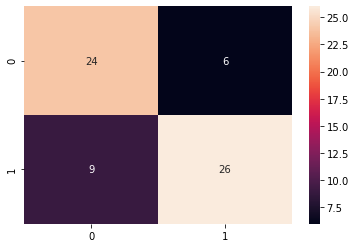

In [13]:
arr1= confusion_matrix(y_test, y_pred)
sn.heatmap(arr1, annot=True)

In [14]:
X1 = df.drop(['class'], axis=1)
newy = y.map({'buggy': 1, 'clean': 0})

In [15]:
sfs2 = sfs(clf, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [16]:
sfs2 = sfs2.fit(X1, newy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    3.0s finished
Features: 60/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.1s finished
Features: 59/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    2.8s finished
Features: 58/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    2.7s finished
Features: 57/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    2.8s finished
Features: 56/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    2.8s finished
Features: 55/10[Par

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
Features: 11/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished
Features: 10/10

In [17]:
feat_names = list(sfs2.k_feature_names_)
print(feat_names)

['WCHU_numberOfAttributes', 'CvsWEntropy', 'numberOfCriticalBugsFoundUntil:', 'LDHH_numberOfPrivateMethods', 'ck_oo_cbo', 'ck_oo_numberOfAttributes', 'CvsLinEntropy', 'LDHH_rfc', 'ck_oo_numberOfMethodsInherited', 'CvsExpEntropy']


In [18]:
new_data = df[feat_names]
new_data['class'] = newy

new_data

<ipython-input-18-332ab692beed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['class'] = newy


,WCHU_numberOfAttributes,CvsWEntropy,numberOfCriticalBugsFoundUntil:,LDHH_numberOfPrivateMethods,ck_oo_cbo,ck_oo_numberOfAttributes,CvsLinEntropy,LDHH_rfc,ck_oo_numberOfMethodsInherited,CvsExpEntropy,class
0,3.04,0.393707,2.0,0.000000,7.0,11.0,0.043005,0.004406,8.0,0.103594,1
1,14.37,2.093750,2.0,0.010354,54.0,67.0,0.149026,0.060301,7.0,0.328692,1
2,3.08,0.484675,0.0,0.001951,26.0,7.0,0.043268,0.002325,7.0,0.125841,0
3,1.06,0.811584,4.0,0.004355,39.0,1.0,0.080838,0.030608,17.0,0.170416,1
4,1.01,0.031940,0.0,0.000577,2.0,1.0,0.022540,0.001492,22.0,0.055912,1
...,...,...,...,...,...,...,...,...,...,...,...
319,0.00,0.052387,0.0,0.000000,10.0,14.0,0.014914,0.000000,16.0,0.041507,0
320,0.00,0.000000,0.0,0.000000,5.0,0.0,0.000000,0.000000,7.0,0.000000,0
321,2.02,0.727254,2.0,0.000000,57.0,7.0,0.114620,0.018394,30.0,0.267032,1
322,0.00,0.000000,0.0,0.000000,2.0,0.0,0.000000,0.000000,9.0,0.000000,0


In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df[feat_names], newy, test_size=0.2, random_state=1)

In [20]:
clf1 = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
# Train Decision Tree Classifer
clf1= clf1.fit(X1_train,y1_train)
#Predict the response for test dataset
y_pred1 = clf1.predict(X1_test)

In [21]:
print("Accuracy of Entropy based Decision Tree:",metrics.accuracy_score(y1_test, y_pred1))

Accuracy of Entropy based Decision Tree: 0.7230769230769231


In [22]:
# transform the dataset
oversample = SMOTE()
X1balance, ybalance = oversample.fit_resample(X1_train, y1_train)

In [23]:
counterBefore = Counter(y1_train)

In [24]:
print(counterBefore)

Counter({0: 160, 1: 99})


In [25]:
counterAfter= Counter(ybalance)

In [26]:
print(counterAfter)

Counter({1: 160, 0: 160})


In [27]:
clf2 = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
# Train Decision Tree Classifer
clf2= clf2.fit(X1balance,ybalance)
#Predict the response for test dataset
y_pred2 = clf2.predict(X1_test)

In [28]:
print("Accuracy of Entropy based Decision Tree:",metrics.accuracy_score(y1_test, y_pred2))

Accuracy of Entropy based Decision Tree: 0.7692307692307693


In [29]:
df_split_x = np.array_split(df[feat_names], 3)
df_split_y = np.array_split(newy, 3)

In [30]:
clust1_X_train, clust1_X_test, clust1_y_train, clust1_y_test = train_test_split(df_split_x[0], df_split_y[0], test_size=0.2, random_state=1)

In [31]:
clf_clust1 = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
# Train Decision Tree Classifer
clf_clust1= clf_clust1.fit(clust1_X_train,clust1_y_train)
#Predict the response for test dataset
y_clust1_pred = clf_clust1.predict(clust1_X_test)
print("Accuracy of Entropy based Decision Tree cluster1:",metrics.accuracy_score(clust1_y_test, y_clust1_pred))

Accuracy of Entropy based Decision Tree cluster1: 0.5454545454545454


In [32]:
clust2_X_train, clust2_X_test, clust2_y_train, clust2_y_test = train_test_split(df_split_x[1], df_split_y[1], test_size=0.2, random_state=1)

In [33]:
clf_clust2 = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
# Train Decision Tree Classifer
clf_clust2= clf_clust2.fit(clust2_X_train,clust2_y_train)
#Predict the response for test dataset
y_clust2_pred = clf_clust2.predict(clust2_X_test)
print("Accuracy of Entropy based Decision Tree cluster1:",metrics.accuracy_score(clust2_y_test, y_clust2_pred))

Accuracy of Entropy based Decision Tree cluster1: 0.6363636363636364


In [34]:
clust3_X_train, clust3_X_test, clust3_y_train, clust3_y_test = train_test_split(df_split_x[2], df_split_y[2], test_size=0.2, random_state=1)

In [35]:
clf_clust3 = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
# Train Decision Tree Classifer
clf_clust3= clf_clust3.fit(clust3_X_train,clust3_y_train)
#Predict the response for test dataset
y_clust3_pred = clf_clust3.predict(clust3_X_test)
print("Accuracy of Entropy based Decision Tree cluster1:",metrics.accuracy_score(clust3_y_test, y_clust3_pred))

Accuracy of Entropy based Decision Tree cluster1: 0.7272727272727273


In [36]:
from sklearn.ensemble import VotingClassifier

In [37]:
voting_clf = VotingClassifier(
    estimators=[('DecisionTree1',clf_clust1), ('DecisionTree2',clf_clust2),('DecisionTree3',clf_clust3)],voting='soft')

In [38]:
voting_clf.fit(X1_train, y1_train)
predictions = voting_clf.predict(X1_test)

In [39]:
print("Accuracy of Mixture of Experts:",metrics.accuracy_score(y1_test, predictions))
print("F1 score", f1_score(y1_test,predictions, average='macro'))

Accuracy of Mixture of Experts: 0.7230769230769231
F1 score 0.7230113636363635


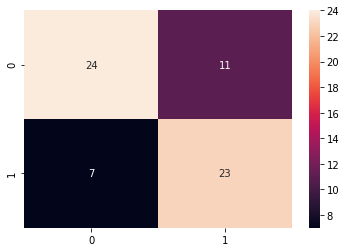

In [40]:
arr2= confusion_matrix(y1_test, predictions)
sn.heatmap(arr2, annot=True)

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, max_iter=50, algorithm="elkan").fit(X1balance)

In [42]:
clustData = kmeans.labels_
    

In [43]:
#separating data on the basis of clusters - explicit partioning
clustX1 = []
clusty1 = []
clustX2 = []
clusty2 = []
clustX3 = []
clusty3 = []
clustX4 = []
clusty4 = []
clustX5 = []
clusty5 = []
arrX= np.array(X1balance)
arrY= np.array(ybalance)
for i in range(len(clustData)):
    if(clustData[i]==0):
        clustX1.append(arrX[i])
        clusty1.append(arrY[i])
    if(clustData[i]==1):
        clustX1.append(arrX[i])
        clusty1.append(arrY[i])
    if(clustData[i]==2):
        clustX3.append(arrX[i])
        clusty3.append(arrY[i])
    if(clustData[i]==3):
        clustX4.append(arrX[i])
        clusty4.append(arrY[i])
    if(clustData[i]==4):
        clustX4.append(arrX[i])
        clusty4.append(arrY[i])
    

In [44]:
print(clusty1, len(clusty1))
print(clusty2, len(clusty2))
print(clusty3, len(clusty3))
print(clusty4, len(clusty4))
print(clusty5, len(clusty5))

[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 281
[] 0
[1, 1, 1, 1, 1] 5
[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] 34
[] 0


In [45]:
#finding best expert for clust1 out of decision tree, svm and logistic
from sklearn import svm
from sklearn.linear_model import LogisticRegression

clustX1train, clustX1test, clusty1train, clusty1test = train_test_split(clustX1, clusty1, test_size=0.2,random_state=1)
dt1 = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(clustX1train,clusty1train)
clusty1pred = dt1.predict(clustX1test)
print("Accuracy of Entropy based Decision Tree cluster1:",metrics.accuracy_score(clusty1test, clusty1pred))

clfsvm = svm.SVC().fit(clustX1train,clusty1train)
clusty1pred = clfsvm.predict(clustX1test)
print("Accuracy of svm cluster1:",metrics.accuracy_score(clusty1test, clusty1pred))

logiclf = LogisticRegression(max_iter=1000).fit(clustX1train,clusty1train)
clusty1pred = logiclf.predict(clustX1test)
print("Accuracy of logistic classifier",metrics.accuracy_score(clusty1test, clusty1pred))

Accuracy of Entropy based Decision Tree cluster1: 0.8245614035087719
Accuracy of svm cluster1: 0.7894736842105263
Accuracy of logistic classifier 0.7543859649122807


In [46]:
# from keras.models import Sequential
# from keras.layers import Dense

In [47]:
# model = Sequential()
# model.add(Dense(12, input_dim=10, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [48]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(clustX1train,clusty1train, epochs=150, batch_size=10)
# predictions = (model.predict(clustX1test) > 0.5).astype(int)
# print("Accuracy of NN cluster1:",metrics.accuracy_score(clusty1test, predictions))

In [49]:

#finding best expert for clust1 out of decision tree, svm and nn


clustX2train, clustX2test, clusty2train, clusty2test = train_test_split(clustX3, clusty3, test_size=0.2,random_state=1)
dt2 = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(clustX2train,clusty2train)
clusty2pred = dt2.predict(clustX2test)
print("Accuracy of Entropy based Decision Tree cluster1:",metrics.accuracy_score(clusty2test, clusty2pred))

clfsvm2 = svm.SVC().fit(clustX2train,clusty2train)
clusty2pred = clfsvm2.predict(clustX2test)
print("Accuracy of svm cluster1:",metrics.accuracy_score(clusty2test, clusty2pred))

logiclf3 = LogisticRegression(max_iter=1000).fit(clustX2train,clusty2train)
clusty2pred = logiclf3.predict(clustX2test)
print("Accuracy of logistic classifier",metrics.accuracy_score(clusty2test, clusty2pred))

Accuracy of Entropy based Decision Tree cluster1: 1.0


ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
#finding best expert for clust1 out of decision tree, svm and nn
from sklearn import svm
from sklearn.linear_model import LogisticRegression

clustX3train, clustX3test, clusty3train, clusty3test = train_test_split(clustX4, clusty4, test_size=0.2,random_state=1)
dt3 = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(clustX3train,clusty3train)
clusty3pred = dt3.predict(clustX3test)
print("Accuracy of Entropy based Decision Tree cluster1:",metrics.accuracy_score(clusty3test, clusty3pred))

clfsvm3 = svm.SVC().fit(clustX3train,clusty3train)
clusty3pred = clfsvm.predict(clustX3test)
print("Accuracy of svm cluster1:",metrics.accuracy_score(clusty3test, clusty3pred))

logiclf3 = LogisticRegression(max_iter=1000).fit(clustX3train,clusty3train)
clusty3pred = logiclf.predict(clustX3test)
print("Accuracy of logistic classifier",metrics.accuracy_score(clusty3test, clusty3pred))

In [ ]:
pred_y_clust1 = dt1.predict(X1balance)
pred_y_clust2 = logiclf3.predict(X1balance)
pred_y_clust3 = clfsvm3.predict(X1balance)

In [ ]:
pred_y_clust1

In [ ]:
index = [];

n1 = pd.DataFrame(pred_y_clust1,columns = ["clust1"])
n2 = pd.DataFrame(pred_y_clust2,columns = ["clust2"])
n3 = pd.DataFrame(pred_y_clust3,columns = ["clust3"])

In [ ]:
X1extra  = pd.concat([X1balance,n1,n2,n3],axis=1)

In [ ]:
X1extra

In [ ]:
finalXtrain, finalXtest, finalytrain, finalytest = train_test_split(X1extra, ybalance, test_size=0.2,random_state=1)
finaldt = DecisionTreeClassifier(criterion = "entropy", splitter = "best").fit(finalXtrain,finalytrain)
finalpred = finaldt.predict(finalXtest)
print("Accuracy of Entropy based Decision Tree cluster:",metrics.accuracy_score(finalytest, finalpred))

In [ ]:
# finaltestpred = finaldt.predict(X1testextra)
# print("Accuracy of Entropy based Decision Tree cluster:",metrics.accuracy_score(y1_test, finaltestpred))

In [ ]:
pred_ytest_clust1 = dt1.predict(X1_test)
pred_ytest_clust2 = logiclf3.predict(X1_test)
pred_ytest_clust3 = clfsvm3.predict(X1_test)
n1 = pd.DataFrame(pred_ytest_clust1,columns = ["clust1"])
n2 = pd.DataFrame(pred_ytest_clust2,columns = ["clust2"])
n3 = pd.DataFrame(pred_ytest_clust3,columns = ["clust3"])

In [ ]:
X1_test.reset_index(inplace=True)
X1_test.drop(columns=["index"],axis=1,inplace=True)
X1_test

In [ ]:
X1testextra  = pd.concat([X1_test,n1,n2,n3],axis=1)

In [ ]:
X1testextra

In [ ]:
finaltestpred = finaldt.predict(X1testextra)
print("Accuracy of Entropy based Decision Tree cluster:",metrics.accuracy_score(y1_test, finaltestpred))